c:\Users\Usuario\anaconda3\envs\tftimeseriesII\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Usuario\anaconda3\envs\tftimeseriesII\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Usuario\anaconda3\envs\tftimeseriesII\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


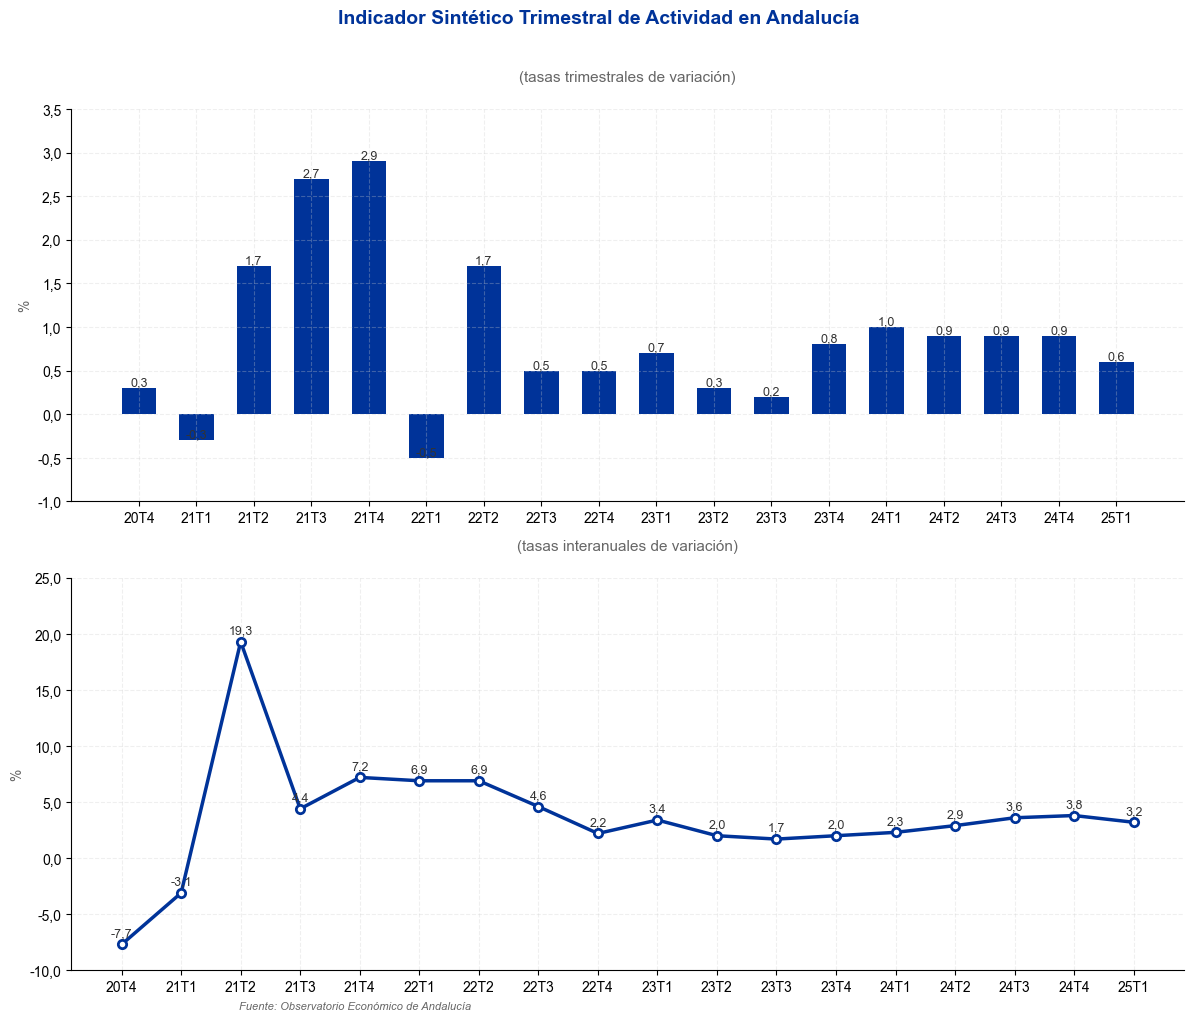

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale

# Configurar el locale para usar coma como separador decimal
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')
plt.rcParams['axes.formatter.use_locale'] = True

# Datos
trimestres = ['20T4', '21T1', '21T2', '21T3', '21T4', '22T1', '22T2', '22T3', '22T4', '23T1', '23T2', '23T3', '23T4', '24T1', '24T2', '24T3', '24T4', '25T1']
datos_trim = [0.3, -0.3, 1.7, 2.7, 2.9, -0.5, 1.7, 0.5, 0.5, 0.7, 0.3, 0.2, 0.8, 1, 0.9, 0.9, 0.9, 0.6]
datos_interanual = [-7.7, -3.1, 19.3, 4.4, 7.2, 6.9, 6.9, 4.6, 2.2, 3.4, 2.0, 1.7, 2.0, 2.3, 2.9, 3.6, 3.8, 3.2]

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), height_ratios=[1, 1])
fig.patch.set_facecolor('white')

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'

# Colores corporativos
COLOR_PRINCIPAL = '#003399'
COLOR_BARRAS = '#003399'

# Gráfico de barras (superior)
bars = ax1.bar(range(len(datos_trim)), datos_trim, color=COLOR_BARRAS, width=0.6)

# Añadir valores encima de las barras con coma como separador decimal
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.1f}'.replace('.', ','),
             ha='center', va='bottom', color='#333333', fontsize=9)

# Configuración del primer gráfico
ax1.set_ylim(-1, 3.5)
ax1.grid(True, alpha=0.3, color='#cccccc', linestyle='--')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xticks(range(len(trimestres)))
ax1.set_xticklabels(trimestres, rotation=0)

# Gráfico de línea (inferior)
ax2.plot(range(len(datos_interanual)), datos_interanual, color=COLOR_PRINCIPAL, 
         linewidth=2.5, marker='o', markersize=6, markerfacecolor='white',
         markeredgewidth=2, markeredgecolor=COLOR_PRINCIPAL)

# Añadir valores en los puntos con coma como separador decimal
for i, v in enumerate(datos_interanual):
    ax2.text(i, v + 0.5, f'{v:,.1f}'.replace('.', ','),
             ha='center', va='bottom', color='#333333', fontsize=9)

# Configuración del segundo gráfico
ax2.set_ylim(-10, 25)
ax2.grid(True, alpha=0.3, color='#cccccc', linestyle='--')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xticks(range(len(trimestres)))
ax2.set_xticklabels(trimestres, rotation=0)

# Títulos y etiquetas
fig.suptitle('Indicador Sintético Trimestral de Actividad en Andalucía', 
             fontsize=14, fontweight='bold', color=COLOR_PRINCIPAL, y=1)
ax1.set_title('(tasas trimestrales de variación)', 
              pad=20, fontsize=11, color='#666666')
ax2.set_title('(tasas interanuales de variación)', 
              pad=20, fontsize=11, color='#666666')

# Añadir etiquetas de porcentaje
ax1.set_ylabel('%', color='#666666')
ax2.set_ylabel('%', color='#666666')

# Ajustar espaciado
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Añadir nota de fuente
plt.figtext(0.2, 0, 'Fuente: Observatorio Económico de Andalucía', 
            fontsize=8, style='italic', color='#666666')

# Formatear los ejes para usar coma como separador decimal
import matplotlib.ticker as ticker

def comma_format(x, p):
    return f"{x:,.1f}".replace('.', ',')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(comma_format))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(comma_format))

plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19404\3556664371.py:93: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


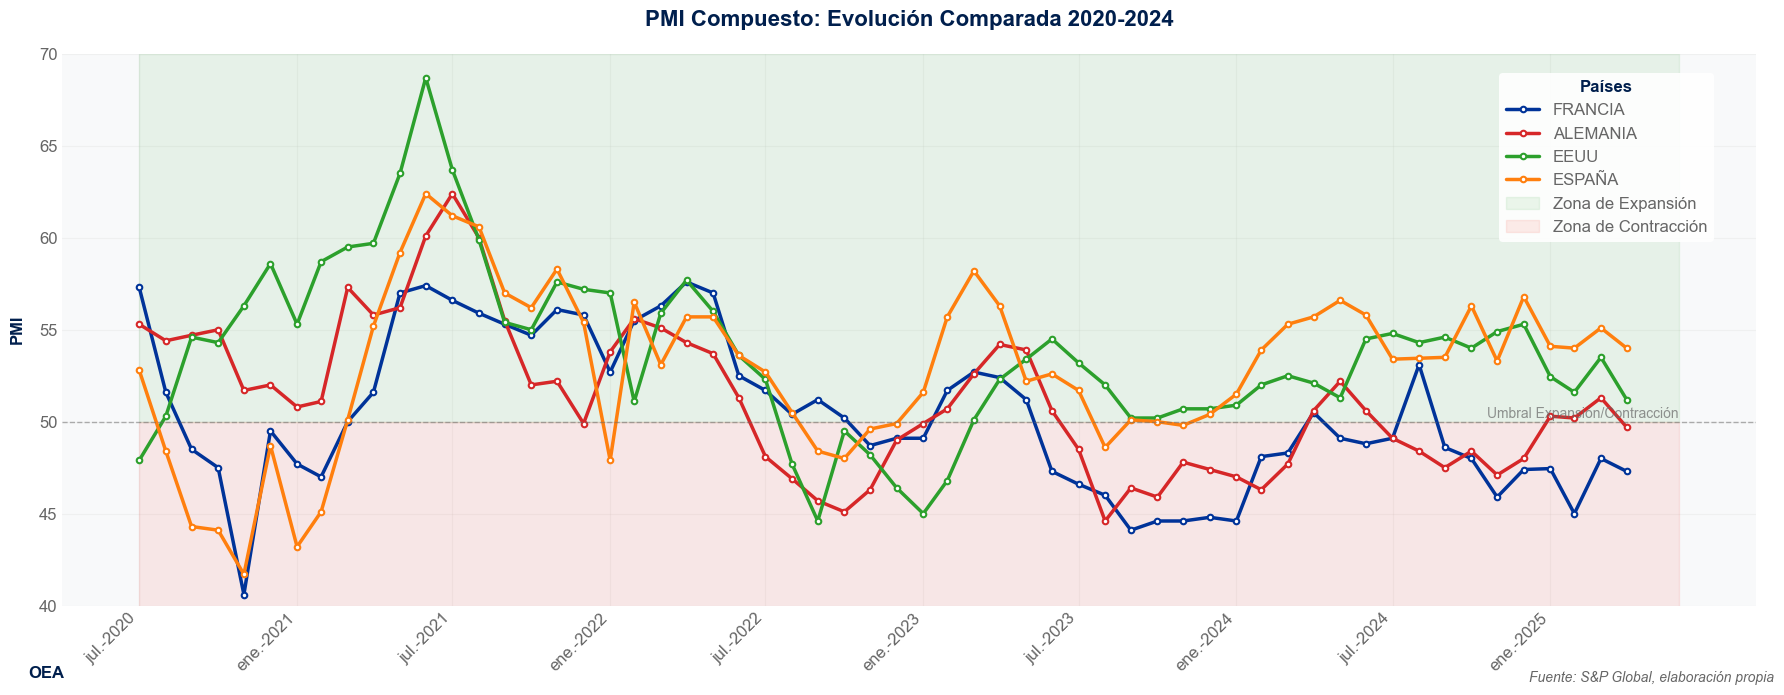

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle

# Cargar datos desde el CSV
df = pd.read_csv(r"C:\Users\Usuario\Documents\Github\Camaras\Series\datos PMI\pmi_data.csv", sep=';')

# Convertir la columna 'fecha' a formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Configurar el estilo y los colores corporativos de OEA
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (18, 7)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'

# Colores corporativos inspirados en la web de OEA
colors = {
    'FRANCIA': '#003399',    # Azul oscuro
    'ALEMANIA': '#D62728',   # Rojo
    'EEUU': '#2CA02C',       # Verde
    'ESPAÑA': '#FF7F0E'      # Naranja
}

# Crear la figura con un fondo específico
fig, ax = plt.subplots(facecolor='white')
ax.set_facecolor('#f8f9fa')

# Dibujar las líneas para cada país
for country in ['FRANCIA', 'ALEMANIA', 'EEUU', 'ESPAÑA']:
    ax.plot(df['fecha'], df[country], label=country, color=colors[country], 
            linewidth=2.5, marker='o', markersize=4, markerfacecolor='white',
            markeredgewidth=1.5, markeredgecolor=colors[country])

# Añadir áreas sombreadas para expansión/contracción con colores más suaves
ax.fill_between(df['fecha'], 50, 70, alpha=0.1, color='#4CAF50', label='Zona de Expansión')
ax.fill_between(df['fecha'], 0, 50, alpha=0.1, color='#F44336', label='Zona de Contracción')

# Añadir línea horizontal en 50
ax.axhline(y=50, color='#666666', linestyle='--', alpha=0.5, linewidth=1)
ax.text(df['fecha'].iloc[-1], 50.2, 'Umbral Expansión/Contracción', 
        fontsize=10, alpha=0.7, ha='right', color='#666666')

# Personalizar el gráfico
ax.set_title('PMI Compuesto: Evolución Comparada 2020-2024', 
             pad=20, fontsize=16, fontweight='bold', color='#001f4d')
ax.set_xlabel('')
ax.set_ylabel('PMI', labelpad=10, color='#001f4d', fontweight='bold')

# Configurar los límites y el formato del eje y
ax.set_ylim(40, 70)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}'))

# Rotar las etiquetas del eje x y mostrar menos fechas
plt.xticks(df['fecha'][::6], [d.strftime('%b-%Y') for d in df['fecha'][::6]], 
           rotation=45, ha='right', color='#666666')
ax.tick_params(axis='y', colors='#666666')

# Personalizar la cuadrícula
ax.grid(True, alpha=0.2, color='#cccccc')

# Modificar la leyenda - colocarla dentro del gráfico
legend = ax.legend(title='Países', 
                  loc='upper right',  # Ubicación dentro del gráfico
                  bbox_to_anchor=(0.98, 0.98),  # Ajuste fino de la posición
                  frameon=True, 
                  facecolor='white',
                  edgecolor='none',
                  bbox_transform=ax.transAxes)  # Usar coordenadas relativas al eje

# Añadir un fondo semitransparente a la leyenda para mejorar la legibilidad
legend.get_frame().set_alpha(0.9)
legend.get_frame().set_facecolor('white')
legend.get_title().set_color('#001f4d')
legend.get_title().set_fontweight('bold')
for text in legend.get_texts():
    text.set_color('#666666')

# Ajustar los márgenes - ya no necesitamos tanto espacio a la derecha
plt.tight_layout()
plt.subplots_adjust(right=0.98)  # Aumentar el espacio utilizable del gráfico

# Añadir nota de fuente
plt.figtext(0.99, 0.01, 'Fuente: S&P Global, elaboración propia', 
            ha='right', va='bottom', fontsize=10, style='italic', color='#666666')

# Añadir logo OEA (simulado con texto)
plt.figtext(0.02, 0.02, 'OEA', fontsize=12, weight='bold', color='#001f4d')

# Ajustar los márgenes
plt.tight_layout()
plt.subplots_adjust(right=0.98)

# Eliminar los bordes del gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

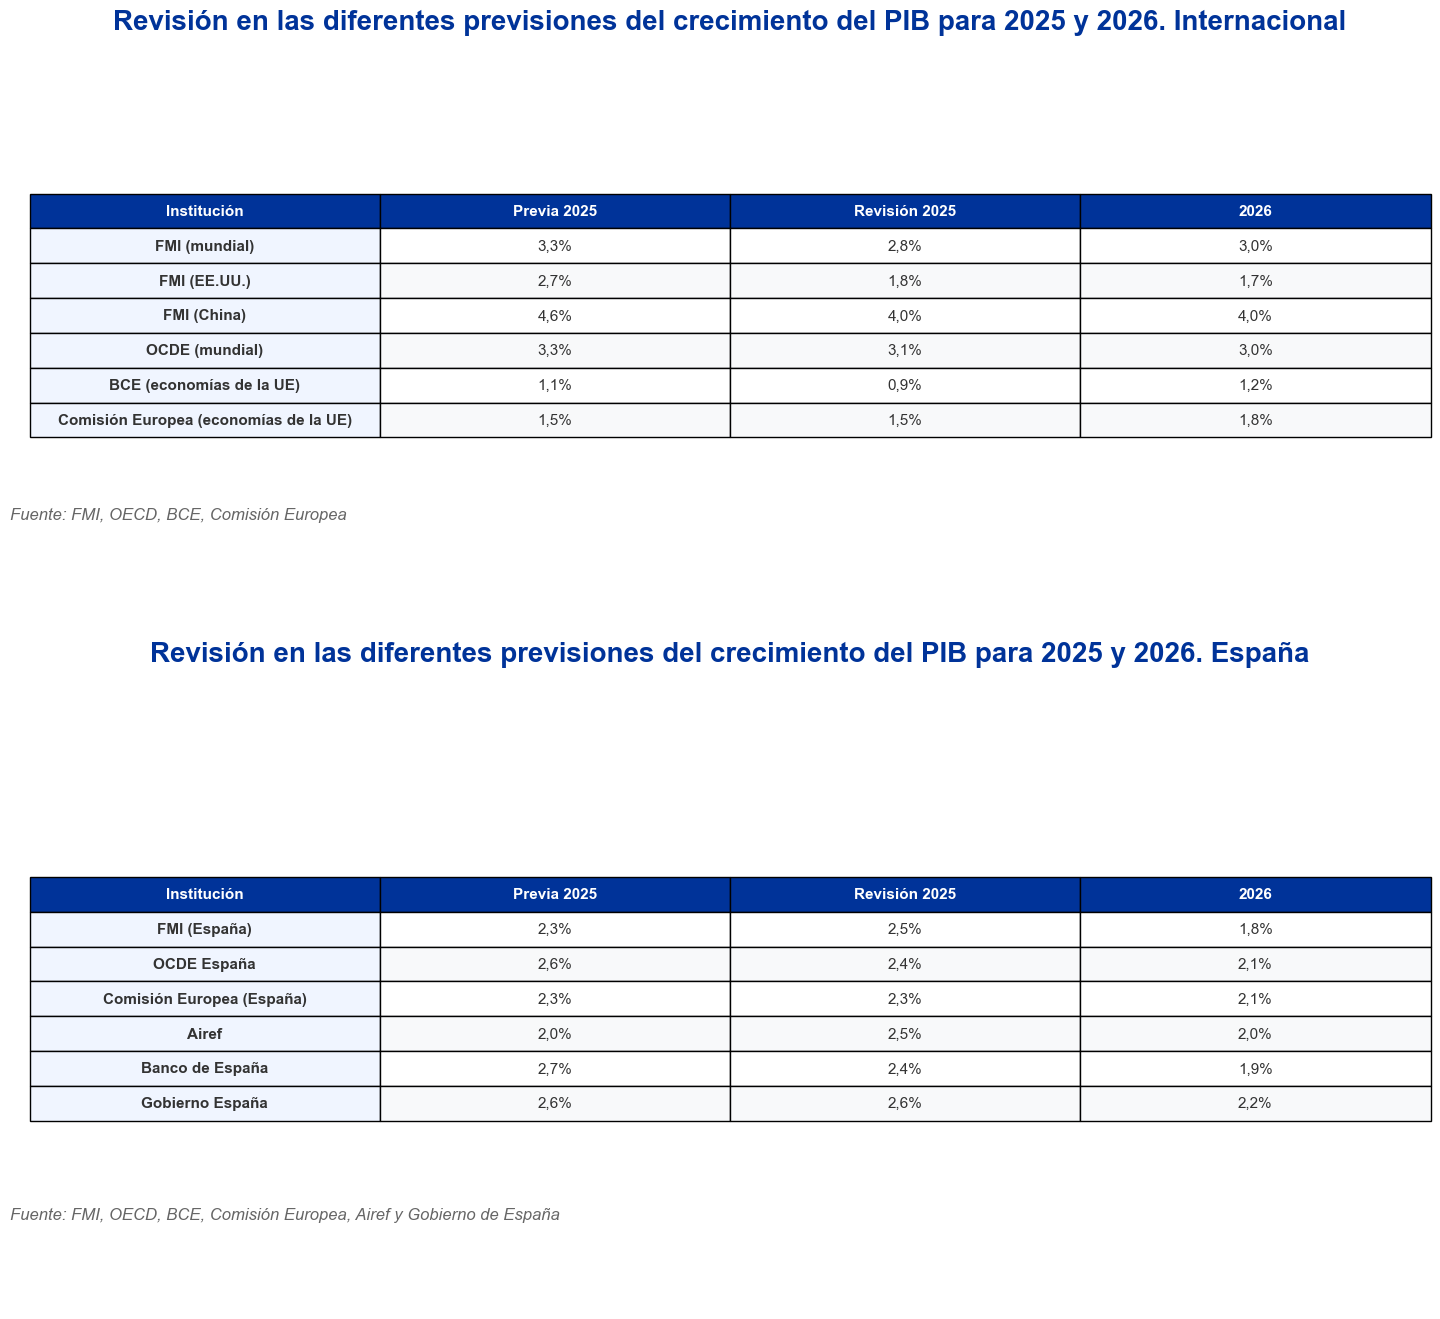

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale

# Configurar el locale para usar coma como separador decimal
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')

# Datos para la tabla internacional
data_internacional = {
    'Institución': ['FMI (mundial)', 'FMI (EE.UU.)', 'FMI (China)', 'OCDE (mundial)', 
                   'BCE (economías de la UE)', 'Comisión Europea (economías de la UE)'],
    'Previa_2025': [3.3, 2.7, 4.6, 3.3, 1.1, 1.5],
    'Revisión_2025': [2.8, 1.8, 4.0, 3.1, 0.9, 1.5],
    '2026': [3.0, 1.7, 4.0, 3.0, 1.2, 1.8]
}

data_españa = {
    'Institución': ['FMI (España)', 'OCDE España', 
                   'Comisión Europea (España)', 'Airef', 'Banco de España', 'Gobierno España'],
    'Previa_2025': [2.3, 2.6, 2.3, 2.0, 2.7, 2.6],
    'Revisión_2025': [2.5, 2.4, 2.3, 2.5, 2.4, 2.6],
    '2026': [1.8, 2.1, 2.1, 2.0, 1.9, 2.2]
}

# Crear figura con dos subplots y espacio adicional para las fuentes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 14), height_ratios=[1, 1.2])
fig.patch.set_facecolor('white')

# Función para crear tabla
def create_table(ax, data, title, source_text, y_source_pos):
    df = pd.DataFrame(data)
    
    # Crear tabla
    table = ax.table(
        cellText=df.values,
        colLabels=['Institución', 'Previa 2025', 'Revisión 2025', '2026'],
        loc='center',
        cellLoc='center',
        colColours=['#003399']*4,
        colLoc='center'
    )
    
    # Estilo de la tabla
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1.2, 1.8)
    
    # Dar formato a las celdas
    for (row, col), cell in table.get_celld().items():
        if row == 0:  # Encabezados
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#003399')
        else:
            cell._text.set_color('#333333')
            if col == 0:  # Primera columna (instituciones)
                cell.set_text_props(weight='bold')
                cell.set_facecolor('#f0f5ff')
            else:  # Columnas de datos
                # Convertir el valor a string con coma como separador decimal
                valor = float(df.iloc[row-1, col])
                valor_str = f'{valor:.1f}'.replace('.', ',') + '%'
                cell._text.set_text(valor_str)
                cell.set_facecolor('#f8f9fa' if row % 2 == 0 else 'white')
    
    # Título de la tabla
    ax.set_title(title, pad=20, fontsize=20, fontweight='bold', color='#003399')
    
    # Añadir fuente debajo de la tabla
    plt.figtext(0.02, y_source_pos, source_text, 
                fontsize=12, style='italic', color='#666666')
    
    # Eliminar ejes
    ax.axis('off')

# Crear tablas con sus respectivas fuentes
create_table(
    ax1, 
    data_internacional, 
    'Revisión en las diferentes previsiones del crecimiento del PIB para 2025 y 2026. Internacional',
    'Fuente: FMI, OECD, BCE, Comisión Europea',
    0.6  # Posición Y de la fuente para la primera tabla
)

create_table(
    ax2, 
    data_españa, 
    'Revisión en las diferentes previsiones del crecimiento del PIB para 2025 y 2026. España',
    'Fuente: FMI, OECD, BCE, Comisión Europea, Airef y Gobierno de España',
    0.1  # Posición Y de la fuente para la segunda tabla
)

# Ajustar espaciado
plt.tight_layout(pad=3.0, h_pad=4.0)

plt.show()